In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.python.keras.layers  import Input, Dense, Activation, Conv2D, ReLU
from keras.layers.recurrent import LSTM
from tensorflow.python.keras.layers  import MaxPooling2D, Dropout, UpSampling2D
from tensorflow.python.keras.layers.merge import Concatenate
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.python.keras import models
from tensorflow.python.keras.layers  import Conv2D, Dropout, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.python.keras.layers  import Lambda, Input
import tensorflow as tf
from keras import layers
from sklearn.model_selection import train_test_split
from google.colab import drive
from keras import backend as K
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers

In [ ]:
drive.mount('/gdrive', force_remount= True)
!unzip /gdrive/My\ Drive/data.zip

In [ ]:
def open_data(in_name):
    #abrir archivo
    with open(in_name, 'r') as f:
        array = []
        for line in f: # read rest of lines
            array.append([float(x) for x in line.split()])
    array=np.array(array)
    return array.T

In [ ]:
pad_SMT = '/content/SMT_dpar_noise/'
pad_labels = '/content/Labels_dpar_noise/'

x= open_data(pad_SMT+'SMT_noise0.txt').T


l_dotf = open_data(pad_labels+'L_DOT_0.txt')
l_csff = open_data(pad_labels+'L_CSF_0.txt')
l_icsf_wmf = open_data(pad_labels+'ICSF_0.txt')
h_wmf = open_data(pad_labels+'L_WM_0.txt')
dpar_wmf = open_data(pad_labels+'L_dpar_WM0.txt')

for i in range(1,99):
    smt = open_data(pad_SMT+'SMT_noise'+str(i+1)+'.txt').T

    l_dot = open_data(pad_labels+'L_DOT_'+str(i+1)+'.txt')
    l_csf = open_data(pad_labels+'L_CSF_'+str(i+1)+'.txt')
    l_icsf_wm = open_data(pad_labels+'ICSF_'+str(i+1)+'.txt')
    h_wm = open_data(pad_labels+'L_WM_'+str(i+1)+'.txt')

    dpar_wm = open_data(pad_labels+'/L_dpar_WM'+str(i+1)+'.txt')

    x = np.concatenate((x, smt), axis=0)

    l_dotf = np.concatenate((l_dotf, l_dot), axis=0)
    l_csff = np.concatenate((l_csff, l_csf), axis=0)
    l_icsf_wmf = np.concatenate((l_icsf_wmf, l_icsf_wm), axis=0)
    h_wmf = np.concatenate((h_wmf, h_wm), axis=0)
    dpar_wmf = np.concatenate((dpar_wmf, dpar_wm), axis=0)

    l_csff = l_csff*(1-l_dotf)

In [ ]:
x2 = l_csff
x = x/x[:,0].reshape(-1,1)
div = int(x.shape[0]*0.01)
idx = np.random.permutation(x.shape[0])
idx_train, idx_test = idx[div:], idx[0:div]
x_train = x[idx_train,:]
y_train = x2[idx_train,:]
x_test = x[idx_test,:]
y_test = x2[idx_test,:]
l_dotf = l_dotf[idx_test]
l_csff = l_csff[idx_test]
l_icsf_wmf = l_icsf_wmf[idx_test]
h_wmf = h_wmf[idx_test]
dpar_wmf = dpar_wmf[idx_test,:]

In [ ]:
def DNN(input_size):
    model = Sequential()
    # Adding the input layer and the first hidden layer
    model.add(Dense(129, activation = 'relu', input_dim = input_size))
    model.add(Dropout(0.01))
    # Adding the second hidden layer
    model.add(Dense(units = 32, activation = 'relu'))
    model.add(Dropout(0.01))
    # Adding the third hidden layer
    model.add(Dense(units = 16, activation = 'relu',  kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
    # Adding the output layer
    model.add(Dense(units = 1, activation= 'sigmoid'))
    return model

In [ ]:
NN4 = DNN(x_train.shape[1])
NN4.compile(loss='mse', optimizer='Adam')

In [ ]:
history = NN4.fit(x = x_train, 
                y = y_train, 
                validation_split=.2,
                epochs    =100, 
                shuffle   =True,
                batch_size=32)

Epoch 1/100
3137/3137 [==============================] - 11s 3ms/step - loss: 0.0143 - val_loss: 0.0042
Epoch 2/100
3137/3137 [==============================] - 9s 3ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 3/100
3137/3137 [==============================] - 9s 3ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 4/100
3137/3137 [==============================] - 9s 3ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 5/100
3137/3137 [==============================] - 9s 3ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 6/100
3137/3137 [==============================] - 9s 3ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 7/100
3137/3137 [==============================] - 9s 3ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 8/100
3137/3137 [==============================] - 9s 3ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 9/100
3137/3137 [==============================] - 9s 3ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 10/100
3137/3137 [==============================] - 9s 3ms/step - 

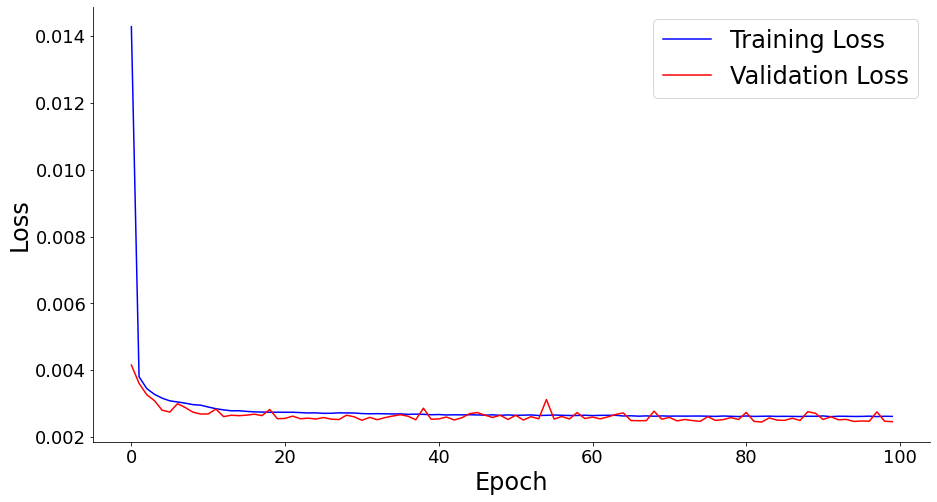

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,8))
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

plt.plot(loss_values, 'b', label = 'Training Loss')
plt.plot(val_loss_values, 'r', label = 'Validation Loss')
plt.xlabel('Epoch', fontsize=24)
plt.ylabel('Loss', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=24)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.draw()
plt.savefig('Loss_csf_30.pdf')

In [ ]:
y_pred = NN4.predict(x_test)

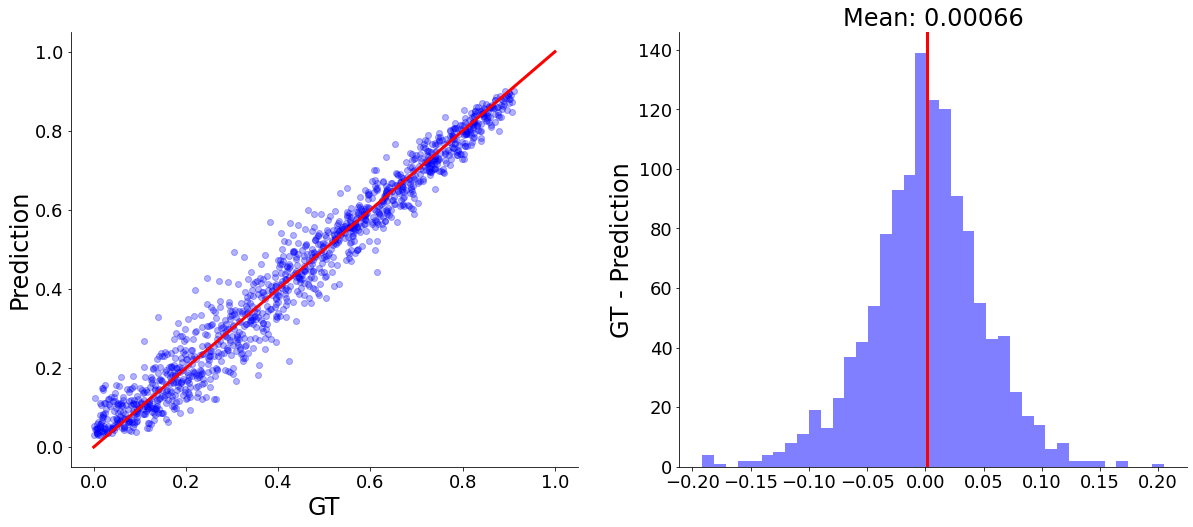

In [ ]:
plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
ax1.scatter(y_test[:,0], y_pred[:,0], color = 'b', alpha = 0.3)
plt.xlabel('GT', fontsize = 24)
plt.ylabel('Prediction', fontsize=24)
ax1.plot([0, 1], [0, 1], color = 'red', linewidth = 3)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2 = plt.subplot(1,2,2)
error = y_test[:,0] - y_pred[:,0]
dot_tejido = error
a = np.min(dot_tejido)
b = np.max(dot_tejido)

bins = np.linspace(a,b,40)
plt.title('Mean: '+str(format(np.mean(dot_tejido), '.5f')), fontsize = 24)
pyplot.hist(dot_tejido, bins, alpha=0.5, color='b')
plt.ylabel('GT - Prediction', fontsize = 24)
plt.axvline(np.median(dot_tejido), color='r', linewidth=3)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.draw()
plt.savefig('test_csf_pa_'+str(snr_n)+'.pdf')

In [ ]:
NN4.save('model_csf_dot10.h5')